# MOW 323 - Question 2

# Lanz Ebersohn
# u18285229

In [2]:
try:
    import os    
    if "add_engmod.py" in os.listdir(): 
        print("Exists!"); import add_engmod
        print("Development version is loaded. For office use only.")
except:
    pass
try:
    import importlib; 
    import engmod.structfem as sfem; importlib.reload(sfem)
    import numpy as np 
except Exception as e:
    print(e)
    print("Engmod is not imported. Please ensure that the jupyter notebook and engmod folder is in the same directory.")
import matplotlib.pyplot as plt 

# Define cross-sectional area and moment of inertia in m$^2$ and m$^4$, respectively for the geometry given in the question paper

In [3]:
r = 0.01
A = np.pi*(r**2) # m^2

I = np.pi*((r*2)**4)/64 # m^4

print("A =",A)
print("I =",I)

A = 0.0003141592653589793
I = 7.853981633974483e-09


# This code checks whether you have updated A and I in the previous cell

In [4]:
assert np.abs(A - 1.0) >1E-6, "The placeholder value for A is not replaced. Please replace this value."

In [5]:
assert np.abs(I - 1.0) >1E-6, "The placeholder value for I is not replaced. Please replace this value."

# FEM Setup

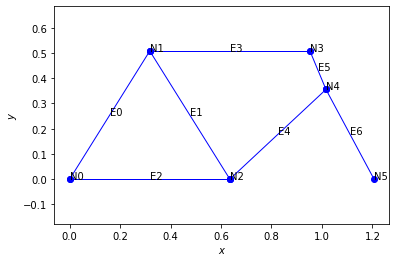

In [6]:
density = 7800 # kg/m^3

E = 200E9 # Pa

# Nodal coordinates are in metres:
node_coordinates = np.array([[   0. ,    0. ],
                               [ 317.5,  508. ],
                               [ 635. ,    0. ],
                               [ 952.5,  508. ],
                               [1016. ,  355.6],
                               [1206.5,    0. ]]) / 1000.0

element_connectivity = np.array([
                                 [0,1],
                                 [1,2],
                                 [0,2],
                                 [1,3],
                                 [2,4],
                                 [3,4],
                                 [4,5]])

prescribed_displacement = np.array([[0,0,0],
                                    [0,1,0],
                                    [5,1,0]])

# Prescribed forces are in N. 
prescribed_forces = np.array([[1,1,-700],[3,1,-300]])

try:
    elem_I = np.array([I, I, I, I, I, I ,I])
    elem_A = np.array([A, A, A, A, A, A ,A])
except Exception as e: 
    raise ValueError("The cross-sectional areas and/or the mass moment of inertia are/is not defined.")

element_properties_dict = {
    "A": elem_A,
    "I": elem_I,
    "E": np.ones(element_connectivity.shape[0]) * E,
    "density": np.ones(element_connectivity.shape[0]) * density
}


fem = sfem.FEM_Beam_2D(
                            node_coordinates,
                            element_connectivity,
                            prescribed_displacement,
                            prescribed_forces,
                            element_properties_dict,
                        )

fem.plot_system()
plt.axis("equal")
fem.solve()

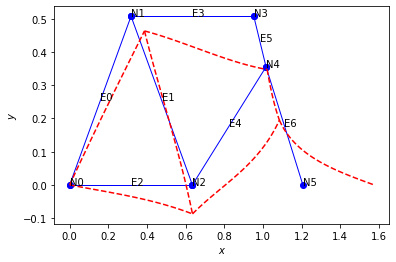

In [20]:
fem.plot_system(show_displacement=True,magnification=100)

# C)

In [13]:
#print(fem.solution_dict['displacements'])
print(fem.solution_dict['displacements'][2*2+1])

-0.0015378203416080035


# D)

In [16]:
print(fem.solution_dict['loads'])
print(fem.solution_dict['loads'][2*0 + 1])


[ 1.09139364e-11  5.78947368e+02  0.00000000e+00  0.00000000e+00
 -7.00000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.00000000e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.21052632e+02  0.00000000e+00]
578.9473684210934


# E)

Minimum bending moment: -17.2445584863603
Maximum bending moment: 80.21052631578037


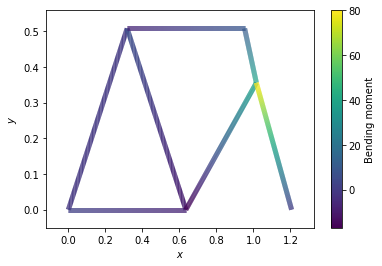

In [19]:
fem.post_plot_bending_moment()



# g)

In [36]:
# it will need to be the element with the largest strain energy
strain = fem.post_axial_stress_strain()['strain']


E1L = ((317.5-635)**2 + (508.-0)**2)**0.5
E3L = ((317.5-952.5)**2 + (508.-508.)**2)**0.5
E4L = ((635-1016.)**2 + (0-355.6)**2)**0.5
E5L = ((1016.-952.5)**2 + (355.6-508.)**2)**0.5



Eeng1 = 0.5*(A*E/E1L)*((strain[1]*E1L)**2)
Eeng3 = 0.5*(A*E/E3L)*((strain[3]*E3L)**2)
Eeng4 = 0.5*(A*E/E4L)*((strain[4]*E4L)**2)
Eeng5 = 0.5*(A*E/E5L)*((strain[5]*E5L)**2)

print(Eeng1)
print(Eeng3)
print(Eeng4)
print(Eeng5)


0.09158817869598024
0.510139274115499
0.4572670115829482
0.18564085769598554


# h) what is the decrease in energy?

{'displacements': array([ 0.00000000e+00,  0.00000000e+00, -1.14244229e-03,  7.05522490e-04,
        -4.48784785e-04, -1.67853084e-03,  3.73840992e-06, -8.85698318e-04,
        -2.13679390e-03,  7.04115670e-04, -1.55687061e-03, -1.52911261e-03,
         6.52902138e-04, -1.57716618e-03,  1.40149605e-03,  3.59189938e-03,
         0.00000000e+00,  1.17013436e-02]),
 'loads': array([ 7.27595761e-11,  5.78947368e+02,  0.00000000e+00,  0.00000000e+00,
        -7.00000000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.00000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.21052632e+02,  0.00000000e+00])}

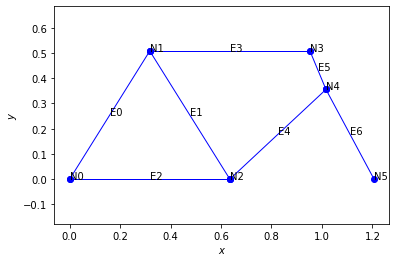

In [39]:
r1 = 0.01 + 0.005
A1 = np.pi*(r1**2) # m^2

I1 = np.pi*((r1*2)**4)/64 # m^4


try:
    elem_I = np.array([I, I, I, I1, I, I ,I])
    elem_A = np.array([A, A, A, A1, A, A ,A])
except Exception as e: 
    raise ValueError("The cross-sectional areas and/or the mass moment of inertia are/is not defined.")

element_properties_dict = {
    "A": elem_A,
    "I": elem_I,
    "E": np.ones(element_connectivity.shape[0]) * E,
    "density": np.ones(element_connectivity.shape[0]) * density
}


femh = sfem.FEM_Beam_2D(
                            node_coordinates,
                            element_connectivity,
                            prescribed_displacement,
                            prescribed_forces,
                            element_properties_dict,
                        )

femh.plot_system()
plt.axis("equal")
femh.solve()

In [42]:
# recalculating the energys
strainh = femh.post_axial_stress_strain()['strain']


E1L = ((317.5-635)**2 + (508.-0)**2)**0.5
E3L = ((317.5-952.5)**2 + (508.-508.)**2)**0.5
E4L = ((635-1016.)**2 + (0-355.6)**2)**0.5
E5L = ((1016.-952.5)**2 + (355.6-508.)**2)**0.5



Eeng1h = 0.5*(A*E/E1L)*((strainh[1]*E1L)**2)
Eeng3h = 0.5*(A1*E/E3L)*((strainh[3]*E3L)**2)
Eeng4h = 0.5*(A*E/E4L)*((strainh[4]*E4L)**2)
Eeng5h = 0.5*(A*E/E5L)*((strainh[5]*E5L)**2)

energh = Eeng1h+Eeng3h+Eeng4h+Eeng5h
energ = Eeng1+Eeng3+Eeng4+Eeng5

print(energh)
print(energ)
print(energh-energ)

0.9696748096148236
1.244635322090413
-0.2749605124755894


# i) max displacement(use unmodified model)

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  1.76711474e-03, -8.93101675e-04,
         5.64517657e-04,  1.43273917e-03, -2.94150065e-06,  1.12763298e-03,
         2.13666519e-03, -8.86925306e-04,  1.59734582e-03,  3.00098007e-03,
        -5.72035245e-04,  1.72780839e-03, -4.72870933e-04, -3.79096970e-03,
         0.00000000e+00, -1.33476804e-02]),
 'loads': array([-2.18278728e-11, -4.73684211e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.26315789e+02,  0.00000000e+00])}

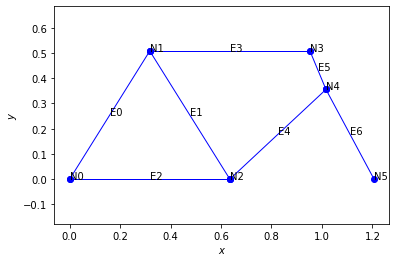

In [43]:


# Prescribed forces are in N. 
prescribed_forces = np.array([[2,1,1000]])

try:
    elem_I = np.array([I, I, I, I, I, I ,I])
    elem_A = np.array([A, A, A, A, A, A ,A])
except Exception as e: 
    raise ValueError("The cross-sectional areas and/or the mass moment of inertia are/is not defined.")

element_properties_dict = {
    "A": elem_A,
    "I": elem_I,
    "E": np.ones(element_connectivity.shape[0]) * E,
    "density": np.ones(element_connectivity.shape[0]) * density
}


fem = sfem.FEM_Beam_2D(
                            node_coordinates,
                            element_connectivity,
                            prescribed_displacement,
                            prescribed_forces,
                            element_properties_dict,
                        )

fem.plot_system()
plt.axis("equal")
fem.solve()

In [44]:
fem.eigen()

{'natural_frequencies_hz': array([  37.92772206,  109.92337204,  173.71537817,  202.1292945 ,
         369.24573504,  442.72379808,  644.52577576,  830.39152713,
         914.62155039, 1333.46337422, 2243.49669649]),
 'modes': array([[ 2.85594221e-01,  2.70011256e+00, -2.06287614e-01,
          6.88025587e+00, -4.43784746e+00, -6.43049024e+00,
          1.86160422e+00, -5.72282707e-01, -4.92272427e+00,
          1.66536217e+00,  4.82896594e-01],
        [-1.77311107e-01, -2.51868835e-01,  1.44613561e-02,
          2.23354061e-01,  5.03664757e-03,  5.90818402e-02,
          2.13727595e-01,  2.88517783e-01,  1.53167271e-02,
         -2.58589602e-01, -3.99447637e-02],
        [ 1.11133431e-01,  1.58564709e-01, -2.00912258e-02,
         -1.39830205e-01, -1.88466357e-02, -6.87676955e-02,
         -7.19447047e-02,  8.69108011e-02,  1.20686957e-01,
         -5.06688127e-01, -6.56401151e-01],
        [ 4.49121964e-01, -1.35278599e+00, -4.87449724e+00,
         -2.27677801e+00, -7.54414630e-01,

# This is a copy of the original code

```python

density = 7800 # kg/m^3

E = 200E9 # Pa

# Nodal coordinates are in metres:
node_coordinates = np.array([[   0. ,    0. ],
                               [ 317.5,  508. ],
                               [ 635. ,    0. ],
                               [ 952.5,  508. ],
                               [1016. ,  355.6],
                               [1206.5,    0. ]]) / 1000.0

element_connectivity = np.array([
                                 [0,1],
                                 [1,2],
                                 [0,2],
                                 [1,3],
                                 [2,4],
                                 [3,4],
                                 [4,5]])

prescribed_displacement = np.array([[0,0,0],
                                    [0,1,0],
                                    [5,1,0]])

# Prescribed forces are in N. 
prescribed_forces = np.array([[1,1,-700],[3,1,-300]])

try:
    elem_I = np.array([I, I, I, I, I, I ,I])
    elem_A = np.array([A, A, A, A, A, A ,A])
except Exception as e: 
    raise ValueError("The cross-sectional areas and/or the mass moment of inertia are/is not defined.")

element_properties_dict = {
    "A": elem_A,
    "I": elem_I,
    "E": np.ones(element_connectivity.shape[0]) * E,
    "density": np.ones(element_connectivity.shape[0]) * density
}


fem = sfem.FEM_Beam_2D(
                            node_coordinates,
                            element_connectivity,
                            prescribed_displacement,
                            prescribed_forces,
                            element_properties_dict,
                        )

fem.plot_system()
plt.axis("equal")
fem.solve();

```